In [22]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
#Using the reddit API, we want to find the top submissions about the Info Sci major. Since Info Sci is a relatively new major 
# major compared to others, students will still have questions about the major. Reddit can be a source of information
# directly from students and alumni. We will be scraping through the UMD subreddit to find the top submissions about 
# Info Sci so students can take a further insight on what the major is like.
#

import praw
reddit = praw.Reddit(client_id="PNvujO6UYS7Fg8TiGMW3gw", client_secret="pmnSOaAwg7uRW-C0BESMJLvbM7avjQ", user_agent="assignment_1")


In [6]:
headlines = set()
for submission in reddit.subreddit('solar').search('panel',sort='hot',limit=100):
    print(submission.title)
    print(submission.id)
    print(submission.author)
    print(submission.created_utc)
    print(submission.score)
    print(submission.upvote_ratio)
    print(submission.url)
    break
    headlines.add(submission.title)
print(len(headlines))

New roof and Panels vs solar roof/tiles
18k3ji6
SundaySanDiego
1702769203.0
3
1.0
https://www.reddit.com/r/solar/comments/18k3ji6/new_roof_and_panels_vs_solar_rooftiles/
0


In [7]:
#finding how many relevant submissions we get

headlines = set()
for submission in reddit.subreddit('solar').search('panel',sort='hot',limit=1000):
    headlines.add(submission.title)
print(len(headlines))

249


In [8]:
df = pd.DataFrame(headlines)
df.head()

,0
0,Balcony solar
1,Solar quotes
2,New Quote Comparison (South Florida)
3,Question about microinverters before i make th...
4,Huge difference in quotes. One with micro inve...


In [9]:
#putting submissions into csv

df.to_csv('headlines.csv', header=False,encoding='utf-8',index=False)

In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/trintkillip/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA 

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3],width=100)

[{'compound': 0.0, 'headline': 'Balcony solar', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'headline': 'Solar quotes', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0,
  'headline': 'New Quote Comparison (South Florida)',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [14]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.0,1.000,0.000,0.0000,Balcony solar
1,0.0,1.000,0.000,0.0000,Solar quotes
2,0.0,1.000,0.000,0.0000,New Quote Comparison (South Florida)
3,0.0,1.000,0.000,0.0000,Question about microinverters before i make th...
4,0.0,0.859,0.141,0.3182,Huge difference in quotes. One with micro inve...


In [15]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.0,1.000,0.000,0.0000,Balcony solar,0
1,0.0,1.000,0.000,0.0000,Solar quotes,0
2,0.0,1.000,0.000,0.0000,New Quote Comparison (South Florida),0
3,0.0,1.000,0.000,0.0000,Question about microinverters before i make th...,0
4,0.0,0.859,0.141,0.3182,Huge difference in quotes. One with micro inve...,1


In [16]:
df2 = df[['headline', 'label']]

In [17]:
df2.to_csv('reddit_headlines_labels.csv', encoding='utf-8', index=False)

In [18]:
df.label.value_counts()

label
 0    182
 1     43
-1     24
Name: count, dtype: int64

In [19]:
df.label.value_counts(normalize=True) * 100

label
 0    73.092369
 1    17.269076
-1     9.638554
Name: proportion, dtype: float64

In [20]:
print("Positive headlines:\n")
pprint(list(df[df['label'] ==1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] ==-1].headline)[:5], width=200)


Positive headlines:

['Huge difference in quotes. One with micro inverters; other with string inverters. Is that expected?',
 'Adding panels in a cheap, easy way?',
 "1 st Year Performance. Am I off to a good start? I installed an irradiance sensor in August and hope to report next year performance relative to sun's energy here in cloudy Northeast PA. This "
 "fall, my panels were converting 20.7% of sun's energy to DC energy. My 3 SMA inverters operated at 97.4%.",
 'Bought a house with Solar and a Sunny Boy inverter. Is there a way to get access to an app to monitor power flow?',
 'Shout out to the good solar people out there!']

Negative headlines:

['Solar trapped', 'Opinions on ground mounted solar panels with concrete blocks', 'Stupid question', 'In South FL? Avoid Simple Solar.', 'Solaredge inverter showing Fault']


/var/folders/0s/skx6j8l16fv3rkwbhq4wkzb00000gn/T/ipykernel_51752/2922631796.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])


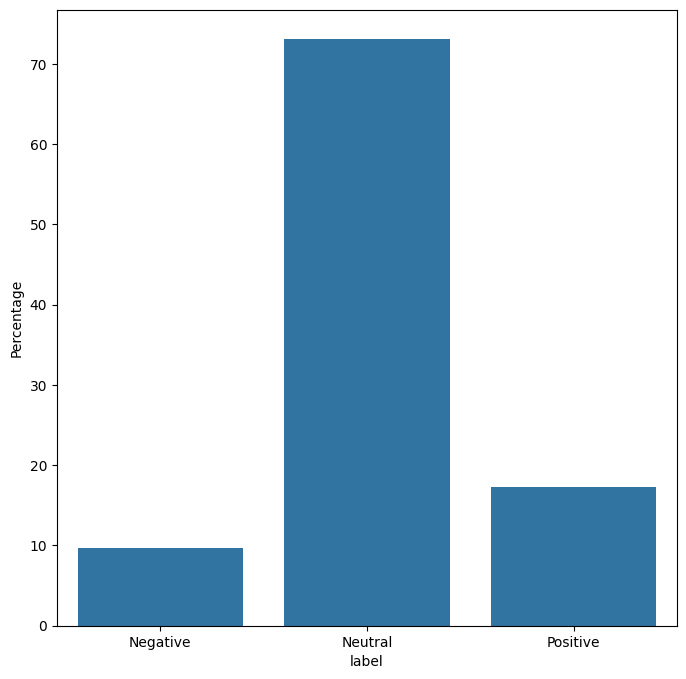

In [24]:
fig, ax = plt.subplots(figsize=(8,8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

ax.set_ylabel('Percentage')

plt.show()


